In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sampled_combined_data.csv')

# Display the first few rows
print(df.head())

# Check basic info about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


     index  FlightDate                 Airline Origin Dest  Cancelled  \
0  2846883  2018-03-24  Hawaiian Airlines Inc.    LIH  HNL      False   
1  3173911  2018-04-23       Endeavor Air Inc.    BOS  PIT      False   
2  2435108  2018-02-16  Southwest Airlines Co.    HOU  ECP      False   
3  2234995  2018-12-07  Southwest Airlines Co.    MDW  MCO      False   
4  3986585  2018-06-03  Southwest Airlines Co.    LAS  LIT      False   

   Diverted  CRSDepTime  DepTime  DepDelayMinutes  ...  WheelsOn  TaxiIn  \
0     False        1900   1855.0              0.0  ...    1920.0     7.0   
1     False        2055   2111.0             16.0  ...    2253.0    23.0   
2     False        1650   1728.0             38.0  ...    1859.0     4.0   
3     False        1845   1851.0              6.0  ...    2207.0     7.0   
4     False        1200   1201.0              1.0  ...    1637.0     2.0   

   CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  ArrTimeBlk  \
0        1935      -8.0       0.0  

In [42]:
# HANDLING MISSING VALUES

# Drop rows with missing values (if appropriate)

# Drop rows with missing values (if appropriate)
df = df.dropna()

df.drop_duplicates(keep='first',inplace=True)

In [ ]:
# FEATURE ENGINEERING

In [53]:
import pandas as pd

# Convert 'FlightDate' to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Check the result
print(df['FlightDate'].head())


10000   2019-12-25
10001   2019-12-30
10002   2019-04-10
10003   2019-04-10
10004   2019-10-18
Name: FlightDate, dtype: datetime64[ns]


In [7]:
# Extract month (1 for January, 2 for February, etc.)
# df['Month'] = df['FlightDate'].dt.month

# Check the result
print(df[['FlightDate', 'Month']].head())

      FlightDate  Month
10000 2019-12-25     12
10001 2019-12-30     12
10002 2019-04-10      4
10003 2019-04-10      4
10004 2019-10-18     10


In [11]:
# Extract week of the year
# df['Week'] = df['FlightDate'].dt.isocalendar().week

# Check the result
print(df[['FlightDate', 'DayOfWeek']].head())

      FlightDate  DayOfWeek
10000 2019-12-25        3.0
10001 2019-12-30        1.0
10002 2019-04-10        3.0
10003 2019-04-10        3.0
10004 2019-10-18        5.0


In [12]:
# Extract year
# df['Year'] = df['FlightDate'].dt.year

# Check the result
print(df[['FlightDate', 'Year']].head())

      FlightDate    Year
10000 2019-12-25  2019.0
10001 2019-12-30  2019.0
10002 2019-04-10  2019.0
10003 2019-04-10  2019.0
10004 2019-10-18  2019.0


In [13]:
print(df[['DayofMonth', 'DayOfWeek']].head())
# print(df[['FlightDate', 'Year']].head())


       DayofMonth  DayOfWeek
10000        25.0        3.0
10001        30.0        1.0
10002        10.0        3.0
10003        10.0        3.0
10004        18.0        5.0


In [ ]:
print(df[['Origin', 'Dest']].head())

      Origin Dest
10000    BWI  FLL
10001    PIA  SFB
10002    ATL  BOS
10003    LNY  HNL
10004    DFW  ORD


In [14]:
# One-hot encode 'Origin' and 'Dest'
df = pd.get_dummies(df, columns=['Origin', 'Dest'], drop_first=True)

In [15]:
print(df['DepDelay'].head())

10000    -1.0
10001    11.0
10002    -2.0
10003    -9.0
10004   -11.0
Name: DepDelay, dtype: float64


In [16]:
# Example: Assume 'FlightDelay' is the delay in minutes
# Create a binary target: 1 if delay > 15 minutes, else 0
df['Delay'] = (df['DepDelay'] > 15).astype(int)

In [44]:
df['DepDel15'].head(5)

,DepDel15
10000,0.0
10001,0.0
10002,0.0
10003,0.0
10004,0.0


In [ ]:
# ANALYSIS USING MATPLOTLIB

# **ANALYSIS USING MATPLOTLIB**


# **ANALYSIS BASED ON MONTHS**

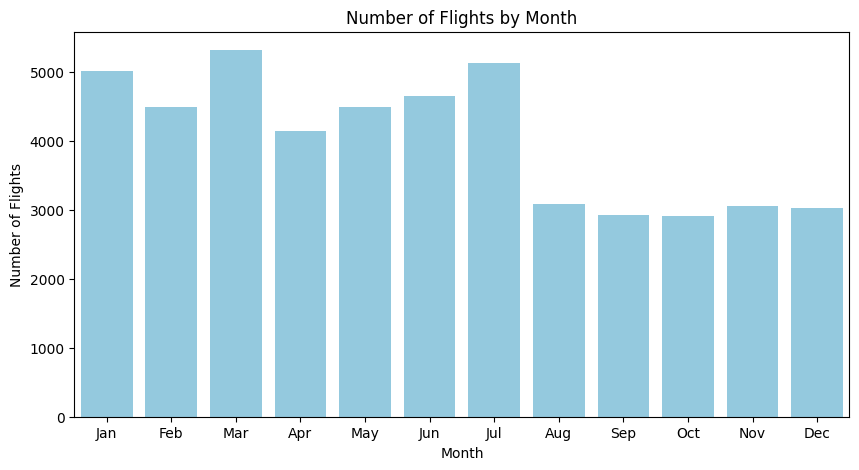

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count flights by month
flights_by_month = df['Month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color='Skyblue')
plt.title('Number of Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [46]:
monthly_delay = df.groupby('Month')['ArrDelayMinutes'].mean()
print(monthly_delay)


Month
1     12.036498
2     14.413663
3     10.182792
4     10.772497
5     12.649544
6     16.634136
7     14.422067
8     13.287609
9      9.952608
10    12.156465
11     8.191956
12    11.743480
Name: ArrDelayMinutes, dtype: float64


In [47]:
monthlyDep_delay = df.groupby('Month')['DepDelayMinutes'].mean()
print(monthlyDep_delay)

Month
1     11.941963
2     14.030485
3     10.106895
4     10.780217
5     12.813654
6     16.570292
7     14.303756
8     12.583953
9     10.130242
10    12.327373
11     8.003270
12    11.592275
Name: DepDelayMinutes, dtype: float64


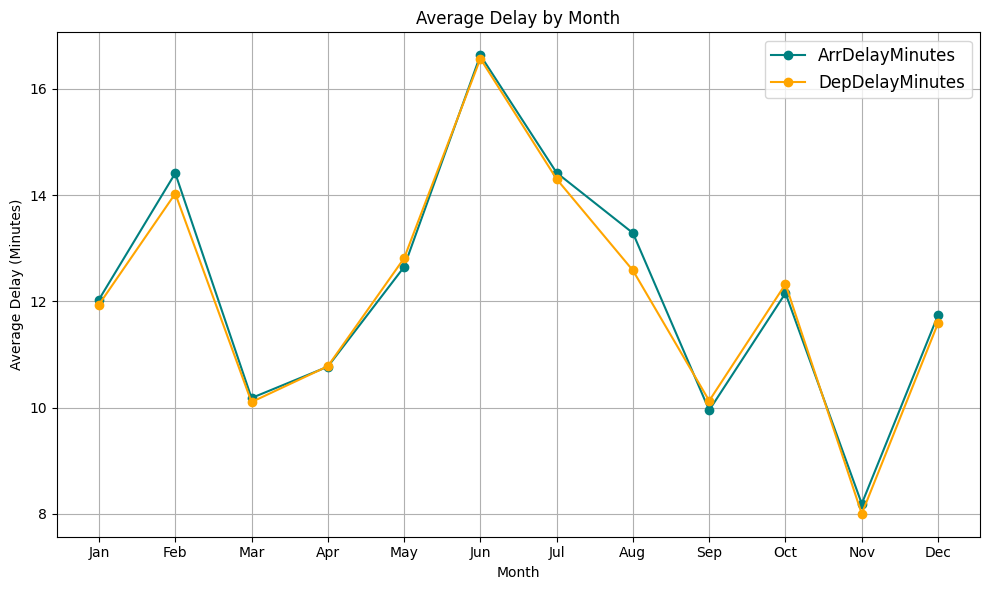

In [48]:
#  Average of DepartureDelay By months
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_delay.plot(kind='line', marker='o', color='teal', title='Average Delay by Month')
monthlyDep_delay.plot(kind='line', marker='o', color='Orange', title='Average Delay by Month')

plt.xlabel('Month')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()


In [49]:
df['Year'].value_counts()


,count
Year,
2022,13521
2021,11775
2019,11717
2020,11270


In [ ]:
# Count of flights by Year
# flights_by_Year = df['Year'].value_counts().sort_index()

# Plot
# plt.figure(figsize=(10, 5))
# sns.barplot(x=flights_by_Year.index, y=flights_by_Year.values, palette='viridis')
# plt.title('Number of Flights by Years')
# plt.xlabel('Years')
# plt.ylabel('Number of Flights')

# plt.show()

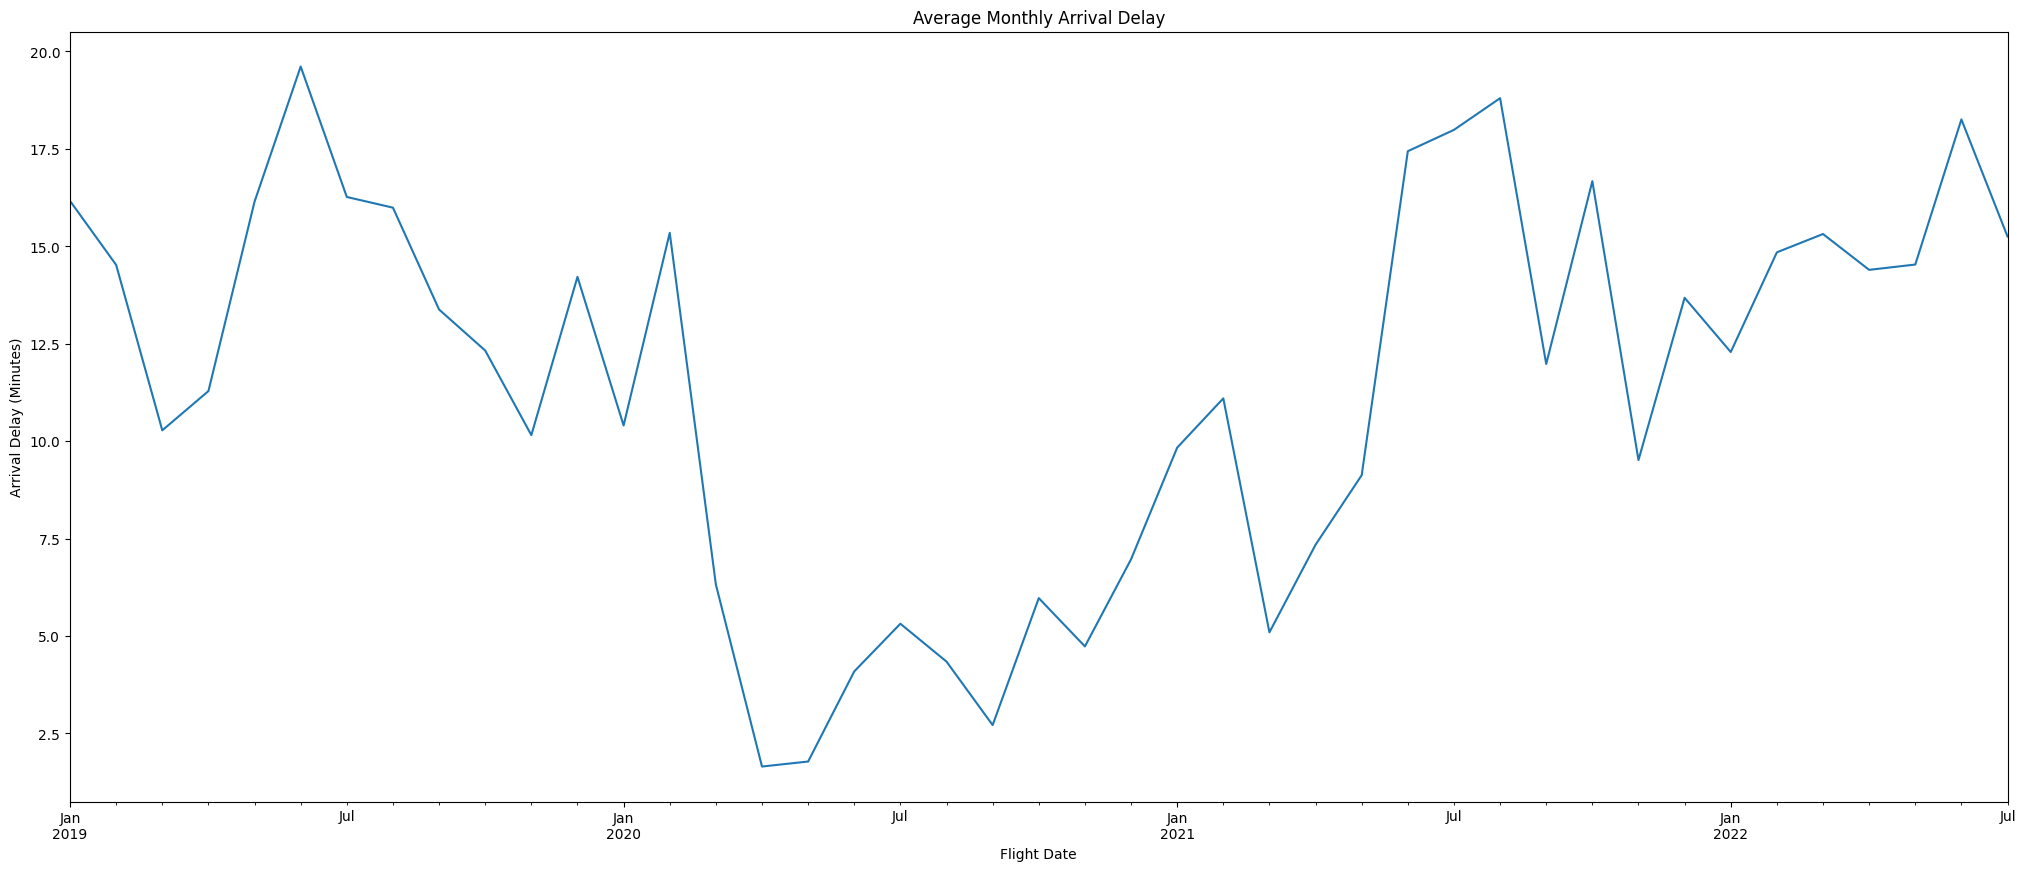

In [55]:
plt.figure(figsize=(25, 10))
monthly_delayes = df.groupby(df['FlightDate'].dt.to_period('M'))['ArrDelayMinutes'].mean()
monthly_delayes.plot(kind='line', title='Average Monthly Arrival Delay')
plt.xlabel('Flight Date')
plt.ylabel('Arrival Delay (Minutes)')
plt.show()


In [ ]:
# # Count flights by week
# flights_by_week = df['DayOfWeek'].value_counts().sort_index()

# # Plot
# plt.figure(figsize=(10, 5))
# sns.barplot(x=flights_by_week.index, y=flights_by_week.values, color='Skyblue')
# plt.title('Number of Flights by Week of the Year')
# plt.xlabel('Week of the Year')
# plt.ylabel('Number of Flights')
# plt.show()

<ipython-input-62-9fd51fb5708c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flights_by_week.index, y=flights_by_week.values, palette='magma')


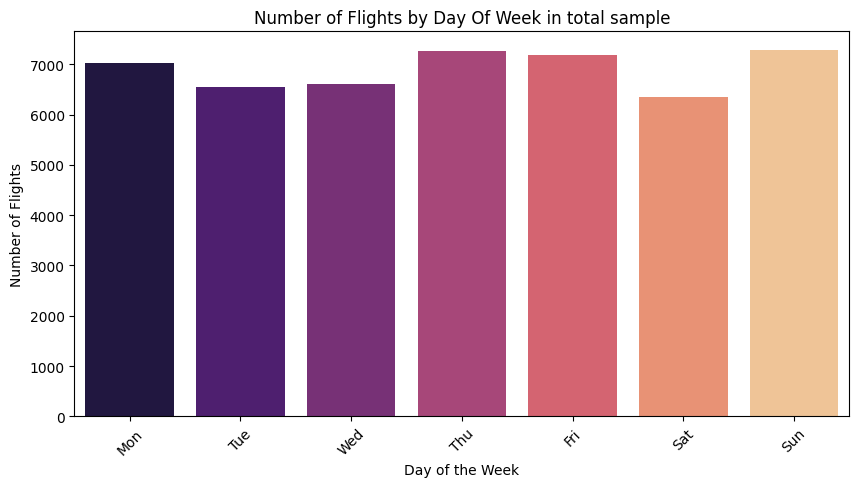

In [62]:
# Count flights by week
flights_by_week = df['DayOfWeek'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=flights_by_week.index, y=flights_by_week.values, palette='magma')
plt.title('Number of Flights by Days Of Week in total sample')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

In [ ]:
weekly_delay = df.groupby('DayOfWeek')['ArrDelayMinutes'].mean()
print(weekly_delay)


DayOfWeek
1    12.642024
2    10.615690
3    11.006060
4    14.120804
5    13.253827
6    11.550150
7    13.200247
Name: ArrDelayMinutes, dtype: float64


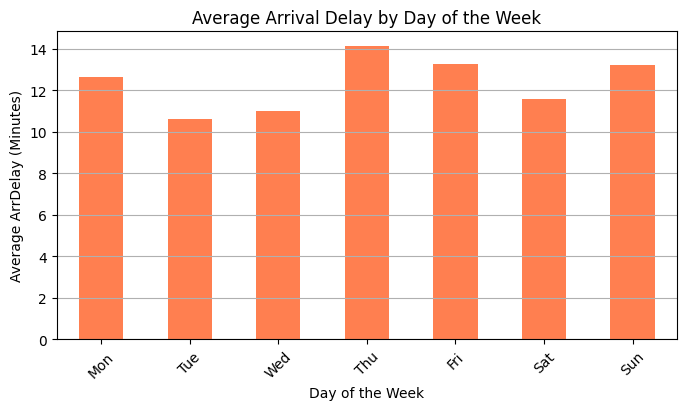

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
weekly_delay.plot(kind='bar', color='coral', title='Average Arrival Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average ArrDelay (Minutes)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# Calculate average delay by month
# avg_delay_by_month = df.groupby('Month')['ArrDelayMinutes'].mean()

# Plot
# plt.figure(figsize=(10, 5))
# sns.barplot(x=avg_delay_by_month.index, y=avg_delay_by_month.values, palette='coolwarm')
# plt.title('Average Flight ArrDelay by Month')
# plt.xlabel('Month')
# plt.ylabel('Average Delay Probability')
# plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# plt.show()

In [63]:
# Check the columns in the DataFrame
print(df.columns)

Index(['index', 'FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled',
       'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay',
       'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime',
       'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month',
       'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline',
       'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'Operating_Airline', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number',
       'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepT

In [ ]:
# Get the list of all 'Dest' columns
dest_columns = [col for col in df.columns if col.startswith('Dest_')]

# Reconstruct the 'Dest' column
df['Dest'] = df[dest_columns].idxmax(axis=1).str.replace('Dest_', '')

# Check the result
print(df[['Dest']].head())

      Dest
10000  FLL
10001  SFB
10002  BOS
10003  HNL
10004  ORD


**ANALYSIS BASED ON DEST AND ORIGIN**

In [65]:
# Group by 'Dest' and calculate average delay
delay_by_dest = df.groupby('Dest')['ArrDelayMinutes'].mean().sort_values(ascending=False)

# Display top 10 destinations with the highest average delay
print(delay_by_dest.head(10))

Dest
DIK    449.000000
VCT    351.500000
EKO    134.000000
PLN    128.000000
DUT    117.000000
RHI     87.000000
CYS     86.000000
GFK     84.454545
EGE     73.416667
LBF     71.400000
Name: ArrDelayMinutes, dtype: float64


In [68]:
# Before running the groupby, add the 'Origin' column back
# Get the list of all 'Origin' columns
# origin_columns = [col for col in df.columns if col.startswith('Origin_')]

# Reconstruct the 'Origin' column
# df['Origin'] = df['Origin'].idxmax(axis=1).str.replace('Origin_', '')

# Now, the groupby should work
delay_by_dest = df.groupby('Origin')['DepDelayMinutes'].mean().sort_values(ascending=False)

# Display top 10 destinations with the highest average delay
print(delay_by_dest.head(10))

Origin
PQI    256.000000
RKS    244.666667
DUT    214.000000
APN    133.000000
BFF    107.500000
ACV    102.285714
HYA     75.000000
ALS     66.666667
RIW     55.000000
BRO     54.833333
Name: DepDelayMinutes, dtype: float64


<ipython-input-71-8ebc2c61b639>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_dest.values, y=top_10_dest.index, palette='viridis')


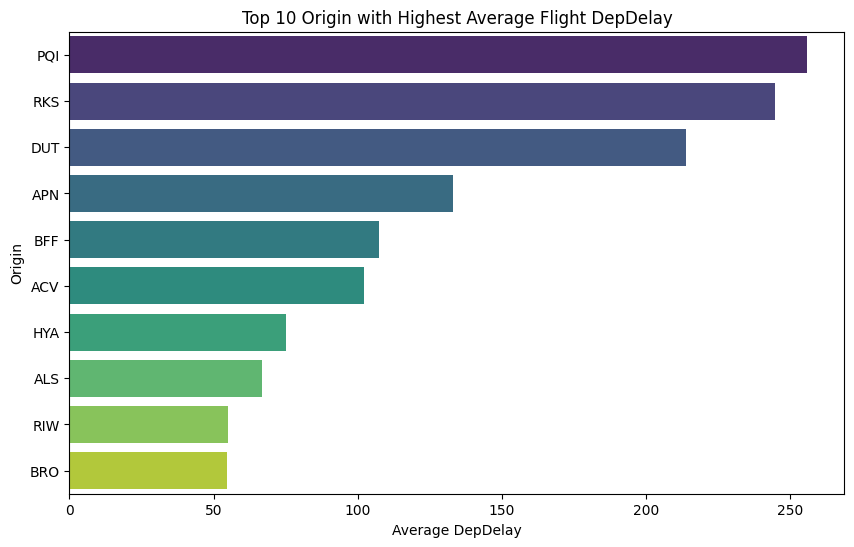

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 destinations with the highest average delay
top_10_dest = delay_by_dest.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_dest.values, y=top_10_dest.index, palette='viridis')
plt.title('Top 10 Origin with Highest Average Flight DepDelay')
plt.xlabel('Average DepDelay')
plt.ylabel('Origin')
plt.show()

Analysing Delays For Specific Destination

In [ ]:
# Example: Analyze delays for a specific destination (e.g., 'ABC')
specific_dest = 'VCT'
specific_dest_col = f'Dest_{specific_dest}'

# Filter the DataFrame for the specific destination
df_specific_dest = df[df[specific_dest_col] == 1]

# Calculate average delay for this destination
avg_delay = df_specific_dest['Delay'].mean()
print(f'Average delay for {specific_dest}: {avg_delay:.2f}')

Average delay for VCT: 0.50


ANALYSIS BASED ON THE ELAPSED TIME OF FLIGHT


In [72]:
# DELAY BY CRSELAPSETIME ()
print(df['CRSElapsedTime'])

10000    160.0
10001    140.0
10002    156.0
10003     32.0
10004    146.0
         ...  
59993    103.0
59994    114.0
59996     48.0
59997     62.0
59998    107.0
Name: CRSElapsedTime, Length: 48283, dtype: float64


In [73]:
# Group by 'Dest' and calculate average delay
delay_by_dest = df.groupby('CRSElapsedTime')['ArrDelayMinutes'].mean().sort_values(ascending=False)

# Display top 10 destinations with the highest average delay
print(delay_by_dest.head(10))

CRSElapsedTime
456.0    101.000000
408.0     82.000000
368.0     58.600000
319.0     55.190476
504.0     52.000000
601.0     52.000000
400.0     51.933333
323.0     48.857143
29.0      45.000000
393.0     41.000000
Name: ArrDelayMinutes, dtype: float64


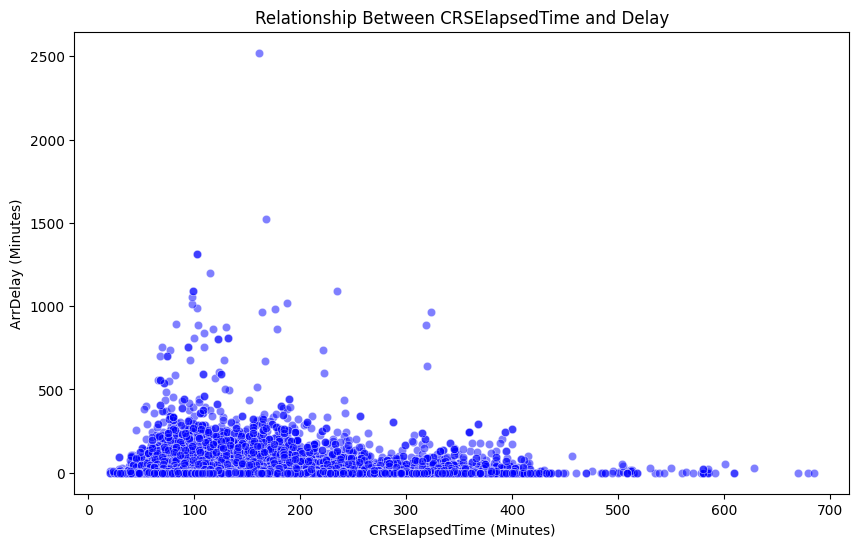

In [74]:


import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of CRSElapsedTime vs Delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CRSElapsedTime', y='ArrDelayMinutes', data=df, alpha=0.5, color='blue')
plt.title('Relationship Between CRSElapsedTime and Delay')
plt.xlabel('CRSElapsedTime (Minutes)')
plt.ylabel('ArrDelay (Minutes)')
plt.show()

In [75]:
print(df[['CRSElapsedTime','ArrDelayMinutes']].head())

       CRSElapsedTime  ArrDelayMinutes
10000           160.0              0.0
10001           140.0              9.0
10002           156.0              0.0
10003            32.0              0.0
10004           146.0              0.0


In [76]:
# Calculate correlation coefficient
correlation = df['CRSElapsedTime'].corr(df['ArrDelayMinutes'])
print(f'Correlation between CRSElapsedTime and ArrDelay: {correlation:.2f}')

Correlation between CRSElapsedTime and ArrDelay: -0.00


In [77]:
# Create bins for CRSElapsedTime (e.g., every 30 minutes)
df['CRSElapsedTime_bin'] = pd.cut(df['CRSElapsedTime'], bins=range(0, int(df['CRSElapsedTime'].max()) + 30, 30))

# Check the bins
print(df['CRSElapsedTime_bin'].value_counts().sort_index())

CRSElapsedTime_bin
(0, 30]          18
(30, 60]       2222
(60, 90]      11156
(90, 120]     10391
(120, 150]     8036
(150, 180]     6612
(180, 210]     3428
(210, 240]     1976
(240, 270]     1322
(270, 300]      942
(300, 330]      876
(330, 360]      644
(360, 390]      413
(390, 420]      171
(420, 450]       23
(450, 480]        5
(480, 510]       14
(510, 540]       11
(540, 570]        4
(570, 600]       12
(600, 630]        4
(630, 660]        0
(660, 690]        3
Name: count, dtype: int64


<ipython-input-72-f4f056f7077d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_by_elapsed_time = df.groupby('CRSElapsedTime_bin')['ArrDelayMinutes'].mean()
<ipython-input-72-f4f056f7077d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_elapsed_time.index.astype(str), y=delay_by_elapsed_time.values, palette='coolwarm')


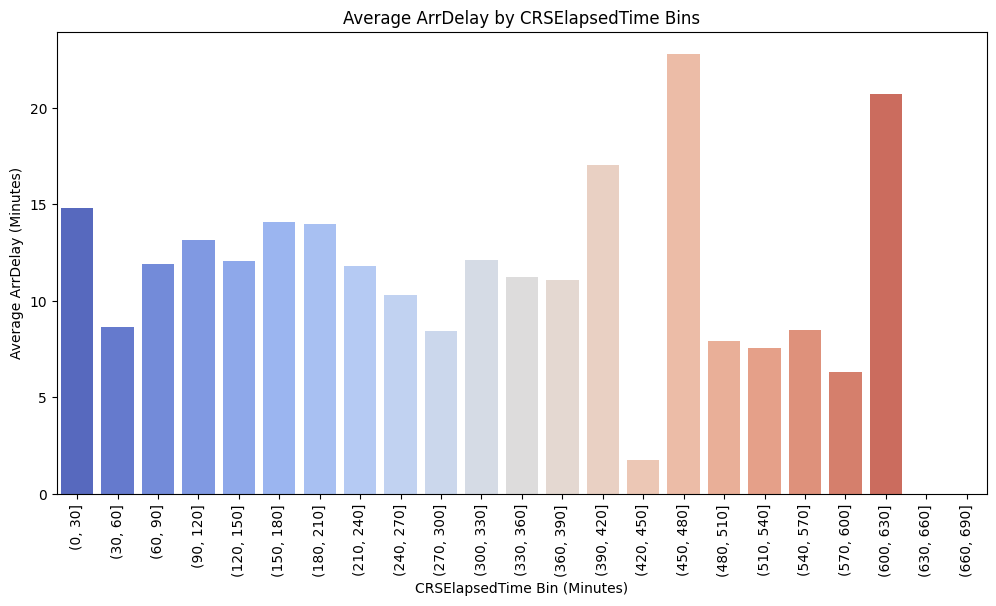

In [ ]:
# Group by CRSElapsedTime_bin and calculate average delay
delay_by_elapsed_time = df.groupby('CRSElapsedTime_bin')['ArrDelayMinutes'].mean()

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_by_elapsed_time.index.astype(str), y=delay_by_elapsed_time.values, palette='coolwarm')
plt.title('Average ArrDelay by CRSElapsedTime Bins')
plt.xlabel('CRSElapsedTime Bin (Minutes)')
plt.ylabel('Average ArrDelay (Minutes)')
plt.xticks(rotation=90)
plt.show()

In [82]:
# Create bins for CRSElapsedTime (e.g., every 30 minutes)
df['Distance_bin'] = pd.cut(df['Distance'], bins=range(0, int(df['Distance'].max()) + 100, 100))

# Check the bins
print(df['Distance_bin'].value_counts().sort_index())

Distance_bin
(0, 100]         796
(100, 200]      3343
(200, 300]      4987
(300, 400]      4971
(400, 500]      4623
(500, 600]      4133
(600, 700]      3959
(700, 800]      2620
(800, 900]      3088
(900, 1000]     2989
(1000, 1100]    2723
(1100, 1200]    1806
(1200, 1300]    1165
(1300, 1400]     718
(1400, 1500]     841
(1500, 1600]     932
(1600, 1700]     554
(1700, 1800]     730
(1800, 1900]     276
(1900, 2000]     412
(2000, 2100]     172
(2100, 2200]     349
(2200, 2300]     250
(2300, 2400]     376
(2400, 2500]     601
(2500, 2600]     427
(2600, 2700]     198
(2700, 2800]      98
(2800, 2900]      25
(2900, 3000]      35
(3000, 3100]       3
(3100, 3200]       0
(3200, 3300]       0
(3300, 3400]       8
(3400, 3500]       6
(3500, 3600]       0
(3600, 3700]       0
(3700, 3800]      26
(3800, 3900]       6
(3900, 4000]       6
(4000, 4100]       0
(4100, 4200]       3
(4200, 4300]       4
(4300, 4400]       0
(4400, 4500]       0
(4500, 4600]       7
(4600, 4700]       2


In [ ]:
#ARRIVAL TIME   AND   DELAY RELATIONSHIP

In [83]:
def categorize_time(arr_time):
    if 600 <= arr_time < 1200:
        return 'Day (6 AM - 12 PM)'
    elif 1200 <= arr_time < 1800:
        return 'Midday (12 PM - 6 PM)'
    elif 1800 <= arr_time < 2400:
        return 'Night (6 PM - 12 AM)'
    else:
        return 'Midnight (12 AM - 6 AM)'

df['ArrivalTimeBlock'] = df['ArrTime'].apply(categorize_time)


In [85]:
time_block_delay = df.groupby('ArrivalTimeBlock')['ArrDelayMinutes'].mean()
print(time_block_delay)


ArrivalTimeBlock
Day (6 AM - 12 PM)          5.992321
Midday (12 PM - 6 PM)      10.638758
Midnight (12 AM - 6 AM)    49.191894
Night (6 PM - 12 AM)       16.222158
Name: ArrDelayMinutes, dtype: float64


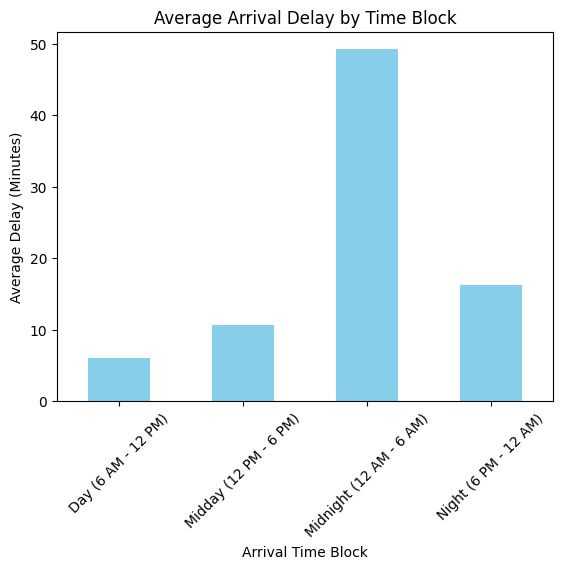

In [86]:
import matplotlib.pyplot as plt

time_block_delay.plot(kind='bar', color='skyblue', title='Average Arrival Delay by Time Block')
plt.xlabel('Arrival Time Block')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45)
plt.show()

In [87]:
df['Route'] = df['Origin'] + ' → ' + df['Dest']


In [88]:
route_delay = df.groupby('Route')['ArrDelayMinutes'].mean().reset_index()


In [89]:
top_50_routes = route_delay.sort_values(by='ArrDelayMinutes', ascending=False).head(50)
print(top_50_routes)


          Route  ArrDelayMinutes
4656  SAV → DCA       897.666667
1857  EWR → OKC       596.000000
1315  DEN → DIK       449.000000
1868  EWR → PWM       390.750000
106   APN → PLN       384.000000
803   CHS → IAD       381.166667
4470  RKS → DEN       368.000000
2475  IAH → VCT       351.500000
414   BGR → ORD       342.000000
628   BTV → DEN       338.000000
3694  OKC → STL       333.000000
1051  COS → PHX       299.000000
4318  PQI → EWR       282.500000
4438  RDU → PVD       257.000000
49    AEX → CLT       248.000000
2528  IND → PGD       236.000000
1882  EWR → SLC       221.500000
3450  MSO → SFO       218.500000
1832  EWR → EGE       216.333333
1745  DUT → ANC       208.000000
4994  SJU → SFB       204.000000
5262  SYR → DEN       202.000000
2039  FWA → SRQ       197.000000
3294  MHT → FLL       195.000000
1805  EVV → DTW       191.000000
2912  LEX → VPS       189.000000
3747  ORD → ASE       177.400000
2802  LAX → BDL       173.000000
4000  PDX → ONT       173.000000
3142  MCO 

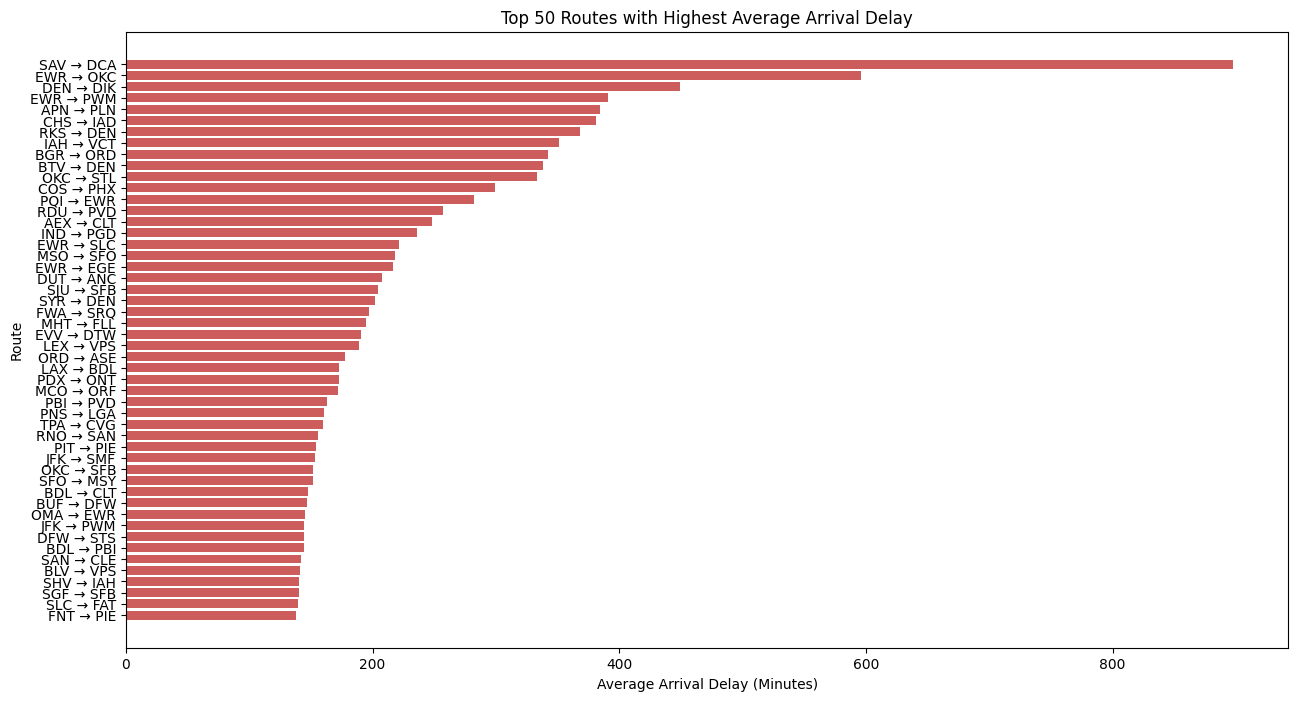

In [ ]:
plt.figure(figsize=(15, 8))
plt.barh(top_50_routes['Route'], top_50_routes['ArrDelayMinutes'], color='indianred')
plt.xlabel('Average Arrival Delay (Minutes)')
plt.ylabel('Route')
plt.title('Top 50 Routes with Highest Average Arrival Delay')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [90]:
airline_delay = df.groupby('Airline')['ArrDelayMinutes'].mean().reset_index()


In [91]:
airline_delay = airline_delay.sort_values(by='ArrDelayMinutes', ascending=False)
print(airline_delay)


                                      Airline  ArrDelayMinutes
19                     Peninsula Airways Inc.       162.500000
6   Commutair Aka Champlain Enterprises, Inc.        32.173913
17                            JetBlue Airways        20.747440
12                   ExpressJet Airlines Inc.        18.712329
24                      Trans States Airlines        18.673077
2                               Allegiant Air        17.929041
14   GoJet Airlines, LLC d/b/a United Express        17.285036
13                     Frontier Airlines Inc.        16.731282
18                         Mesa Airlines Inc.        16.530264
23                           Spirit Air Lines        16.473277
3                      American Airlines Inc.        13.919738
20                          Republic Airlines        13.849822
7                            Compass Airlines        13.664706
25                      United Air Lines Inc.        12.918614
0                 Air Wisconsin Airlines Corp        12

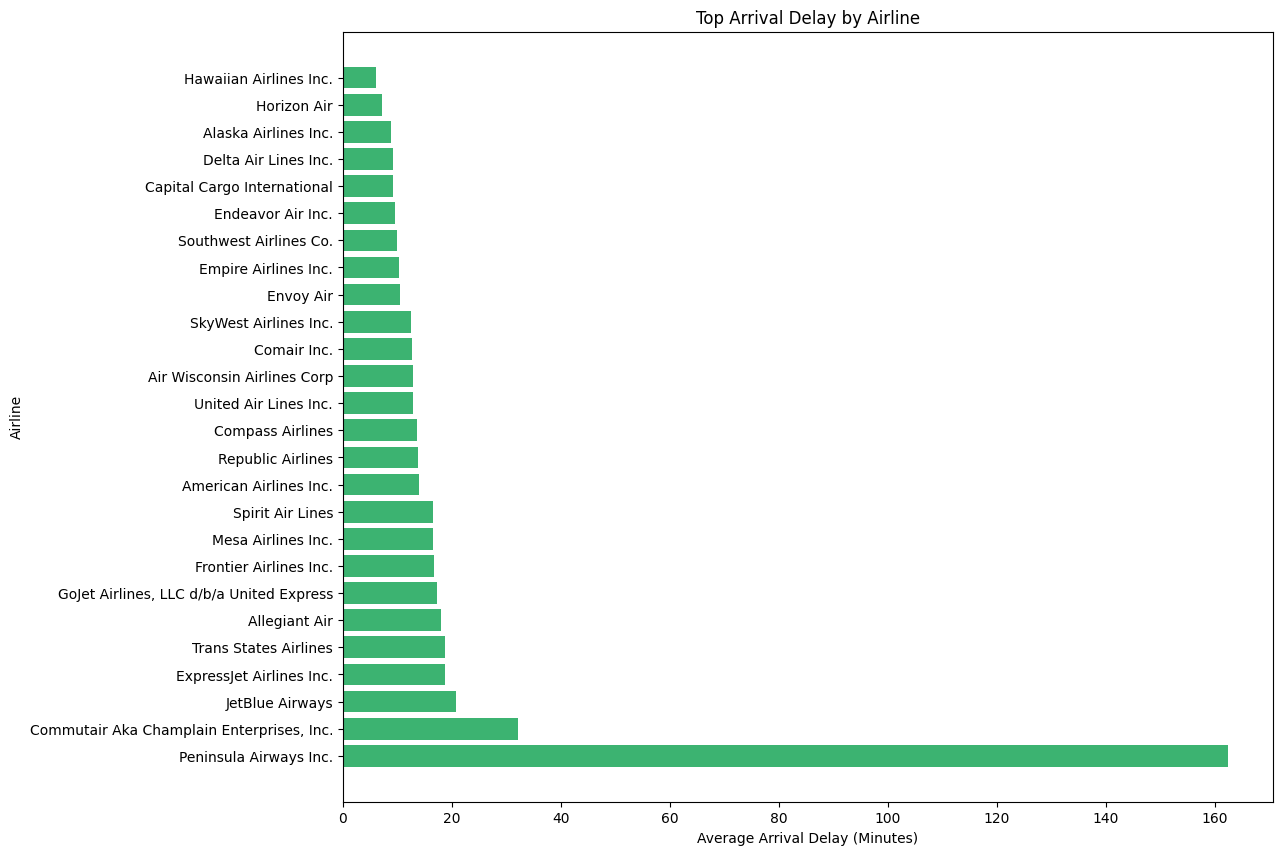

In [93]:
plt.figure(figsize=(12, 10))
plt.barh(airline_delay['Airline'], airline_delay['ArrDelayMinutes'], color='mediumseagreen')
plt.xlabel('Average Arrival Delay (Minutes)')
plt.ylabel('Airline')
plt.title('Top Arrival Delay by Airline')
plt.show()


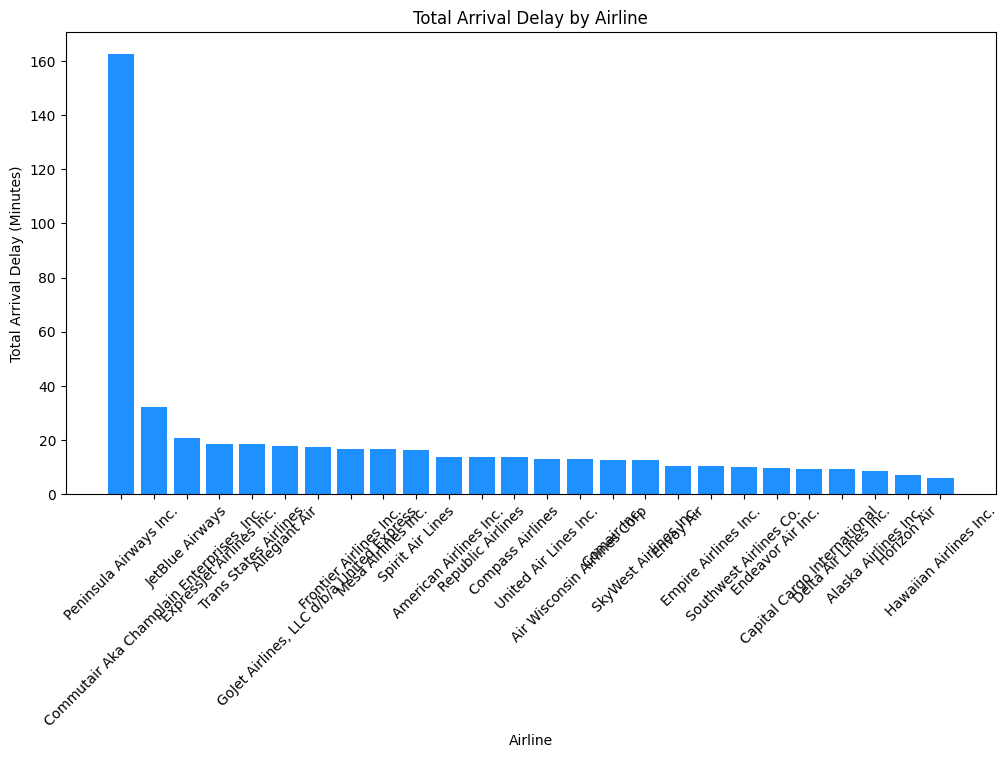

In [94]:
plt.figure(figsize=(12, 6))
plt.bar(airline_delay['Airline'], airline_delay['ArrDelayMinutes'], color='dodgerblue')
plt.xlabel('Airline')
plt.ylabel('Total Arrival Delay (Minutes)')
plt.title('Total Arrival Delay by Airline')
plt.xticks(rotation=45)
plt.show()
